# 학습 내용

 - 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리하고 병합하기

 - 수치형 데이터와 범주형 데이터를 바라보는 시각

 - 데이터의 형식에 따른 다양한 시각화 방법 이해하기

# 해야 할 일

 - 필요한 패키지(라이브러리)를 설치하고 로딩

- 공공데이터 사이트를 활용해 데이터 구하기

- 판다스를 통해 데이터를 요약하고 분석하기

- 데이터 전처리와 병합하기

- 수치형 데이터와 범주형 데이터 다루기

- EDA 실습 (막대그래프(bar plot),  선그래프(line plot), 산포도(scatter plot), 히트맵 그리기)

 - swarm plot, 도수분포표, 히스토그램(distplot) 실습하기


 # 데이터 셋(공공데이터 이용하기)

공공데이터("주택도시보증공사_전국 신규 민간아파트 분양가격 동향") <br>
 https://www.data.go.kr/data/15061057/fileData.do

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family="malgun")
plt.rc('font', family="Apple Gothic")
plt.rc('font', family="Noto Sans KR")
plt.rc('font', family="HANBatang")
plt.rc('font', family="Malgun Gothic")

In [3]:
apt_last = pd.read_csv("C:/Users/ParkHanna/Desktop/HRD/BigData/data/New_APT_Price.csv", encoding='cp949')
apt_last

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
6285,제주,모든면적,2021,11,"6,860"
6286,제주,전용면적 60제곱미터이하,2021,11,NaN
6287,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,11,"6,787"
6288,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,11,"5,924"


In [4]:
apt_last.shape

(6290, 5)

In [5]:
apt_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         6290 non-null   object
 1   규모구분        6290 non-null   object
 2   연도          6290 non-null   int64 
 3   월           6290 non-null   int64 
 4   분양가격(제곱미터)  5812 non-null   object
dtypes: int64(2), object(3)
memory usage: 245.8+ KB


In [6]:
apt_last.isnull()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6285,False,False,False,False,False
6286,False,False,False,False,True
6287,False,False,False,False,False
6288,False,False,False,False,False


In [7]:
apt_last.isnull().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    478
dtype: int64

# 데이터 전처리 - 데이터 타입 변경

데이터 타입 변경 <br>
분양가격 - object 형식임 따라서 계산이 안됨 이를 수치 데이터로 변경해야함<br>
주의 : 결측치가 섞여있을 경우 변환이 제대로 진행 되지 않음 따라서, 데이터 형식을 numeric 형싱으로 변경함

분양가격 항목을 숫자형식으로 변경

errors = 총 3가지 옵션 제공
1. errors = 'ignore' => 만약 숫자로 변경할 수 없는 데이터라면 숫자로 변경하지 않는고 원본 데이터를 그대로 반환
2. errors = 'coerce' => 숫자로 변경할 수 없다면 기존 데이터를 지우고 Nan으로 설정 후 반환
3. errors = 'raise' => 숫자로 변경할 수 없다면 에러를 일으키며 코드 중단

In [8]:
# 여기서는 숫자로 변경할 수 없음, NaN 처리가 가장 적절 따라서 'coerce'로 설정

apt_last['분양가격(m2)'] = pd.to_numeric(apt_last['분양가격(제곱미터)'], errors='coerce')
apt_last['분양가격(m2)'].head()

0    5841.0
1    5652.0
2    5882.0
3    5721.0
4    5879.0
Name: 분양가격(m2), dtype: float64

In [9]:
apt_last

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격(m2)
0,서울,모든면적,2015,10,5841,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0
...,...,...,...,...,...,...
6285,제주,모든면적,2021,11,"6,860",NaN
6286,제주,전용면적 60제곱미터이하,2021,11,NaN,NaN
6287,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,11,"6,787",NaN
6288,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,11,"5,924",NaN


In [10]:
apt_last.isnull().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    478
분양가격(m2)      742
dtype: int64

# 데이터 전처리 - 항목 추가

가격 비교가 용이할 수 있도록 분양가격 구하기 <br>
분양 가격 = 제곱 미터당 으로 구성 따라서 비교를 쉽게 하기 위해 '평당 분양가격' 칼럼을 만들어 추가

In [11]:
apt_last['평당분양가격'] = apt_last['분양가격(m2)'] * 3.3
apt_last

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격(m2),평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
6285,제주,모든면적,2021,11,"6,860",NaN,NaN
6286,제주,전용면적 60제곱미터이하,2021,11,NaN,NaN,NaN
6287,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,11,"6,787",NaN,NaN
6288,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,11,"5,924",NaN,NaN


In [12]:
apt_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         6290 non-null   object 
 1   규모구분        6290 non-null   object 
 2   연도          6290 non-null   int64  
 3   월           6290 non-null   int64  
 4   분양가격(제곱미터)  5812 non-null   object 
 5   분양가격(m2)    5548 non-null   float64
 6   평당분양가격      5548 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 344.1+ KB


In [13]:
apt_last['분양가격(제곱미터)'].describe()

count     5812
unique    2372
top           
freq        31
Name: 분양가격(제곱미터), dtype: object

In [14]:
apt_last['분양가격(제곱미터)'].nunique()

2372

In [15]:
apt_last['분양가격(m2)'].describe()

count     5548.000000
mean      3450.018205
std       1406.599626
min       1868.000000
25%       2567.000000
50%       3064.000000
75%       3911.000000
max      13835.000000
Name: 분양가격(m2), dtype: float64

In [16]:
apt_last['평당분양가격'].describe()

count     5548.000000
mean     11385.060076
std       4641.778765
min       6164.400000
25%       8471.100000
50%      10111.200000
75%      12906.300000
max      45655.500000
Name: 평당분양가격, dtype: float64

# 데이터 전처리 - 규모구분, 전용 면적 변경

In [17]:
apt_last['전용면적'] = apt_last['규모구분'].str.replace('전용면적','')
apt_last['전용면적'] = apt_last['전용면적'].str.replace('초과','~')
apt_last['전용면적'] = apt_last['전용면적'].str.replace('이하','')
apt_last['전용면적'] = apt_last['전용면적'].str.replace('','')
apt_last['전용면적']

0                   모든면적
1                 60제곱미터
2         60제곱미터~ 85제곱미터
3        85제곱미터~ 102제곱미터
4               102제곱미터~
              ...       
6285                모든면적
6286              60제곱미터
6287      60제곱미터~ 85제곱미터
6288     85제곱미터~ 102제곱미터
6289            102제곱미터~
Name: 전용면적, Length: 6290, dtype: object

In [18]:
apt_last

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격(m2),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6,60제곱미터
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6,60제곱미터~ 85제곱미터
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3,85제곱미터~ 102제곱미터
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7,102제곱미터~
...,...,...,...,...,...,...,...,...
6285,제주,모든면적,2021,11,"6,860",NaN,NaN,모든면적
6286,제주,전용면적 60제곱미터이하,2021,11,NaN,NaN,NaN,60제곱미터
6287,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,11,"6,787",NaN,NaN,60제곱미터~ 85제곱미터
6288,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,11,"5,924",NaN,NaN,85제곱미터~ 102제곱미터


# 데이터 전처리 - 필요없는 칼럼 정리

In [19]:
apt_last = apt_last.drop(['분양가격(제곱미터)', '규모구분'], axis = 1)

In [20]:
apt_last

,지역명,연도,월,분양가격(m2),평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,모든면적
1,서울,2015,10,5652.0,18651.6,60제곱미터
2,서울,2015,10,5882.0,19410.6,60제곱미터~ 85제곱미터
3,서울,2015,10,5721.0,18879.3,85제곱미터~ 102제곱미터
4,서울,2015,10,5879.0,19400.7,102제곱미터~
...,...,...,...,...,...,...
6285,제주,2021,11,NaN,NaN,모든면적
6286,제주,2021,11,NaN,NaN,60제곱미터
6287,제주,2021,11,NaN,NaN,60제곱미터~ 85제곱미터
6288,제주,2021,11,NaN,NaN,85제곱미터~ 102제곱미터


# EDA - Groupby 로 데이터 집계

<Axes: title={'center': '지역별 평당 평균 분양 가격'}, xlabel='지역명'>

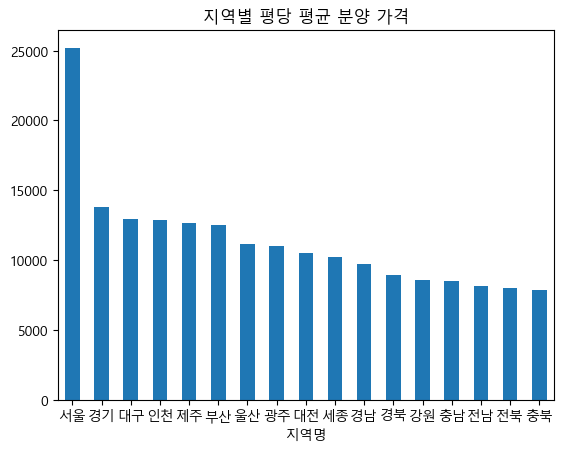

In [21]:
# 지역별 평당 평균 분양가격
mean_price = apt_last.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)
mean_price.plot.bar(rot =0, title="지역별 평당 평균 분양 가격")

#전용 면적당 평당 평균 분양가격

<Axes: title={'center': '전용 면적당 평당 평균 분양 가격'}, ylabel='전용면적'>

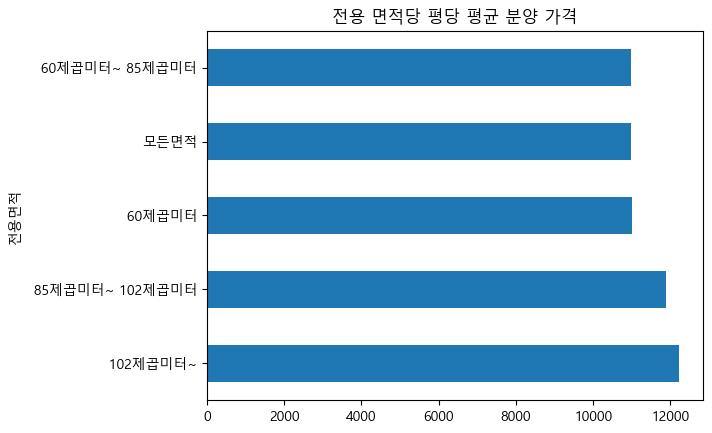

In [22]:
average_price = apt_last.groupby(['전용면적'])['평당분양가격'].mean().sort_values(ascending=False)
average_price.plot.barh(rot=0, title="전용 면적당 평당 평균 분양 가격")

<Axes: title={'center': '전용 면적당 평당 평균 분양 가격'}, xlabel='전용면적'>

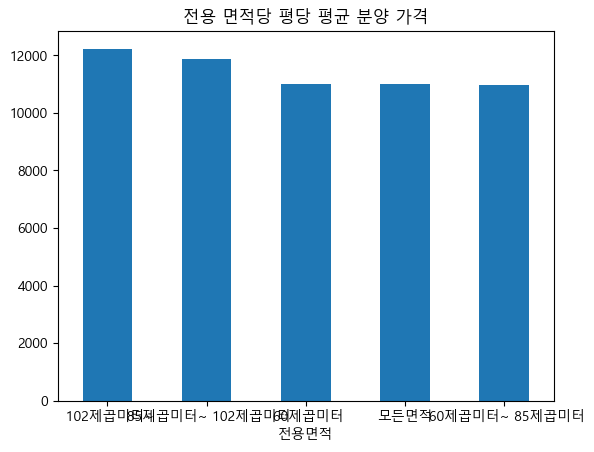

In [23]:
average_price.plot.bar(rot=0, title="전용 면적당 평당 평균 분양 가격")

지역별 전용면적별 평당 분양 가격

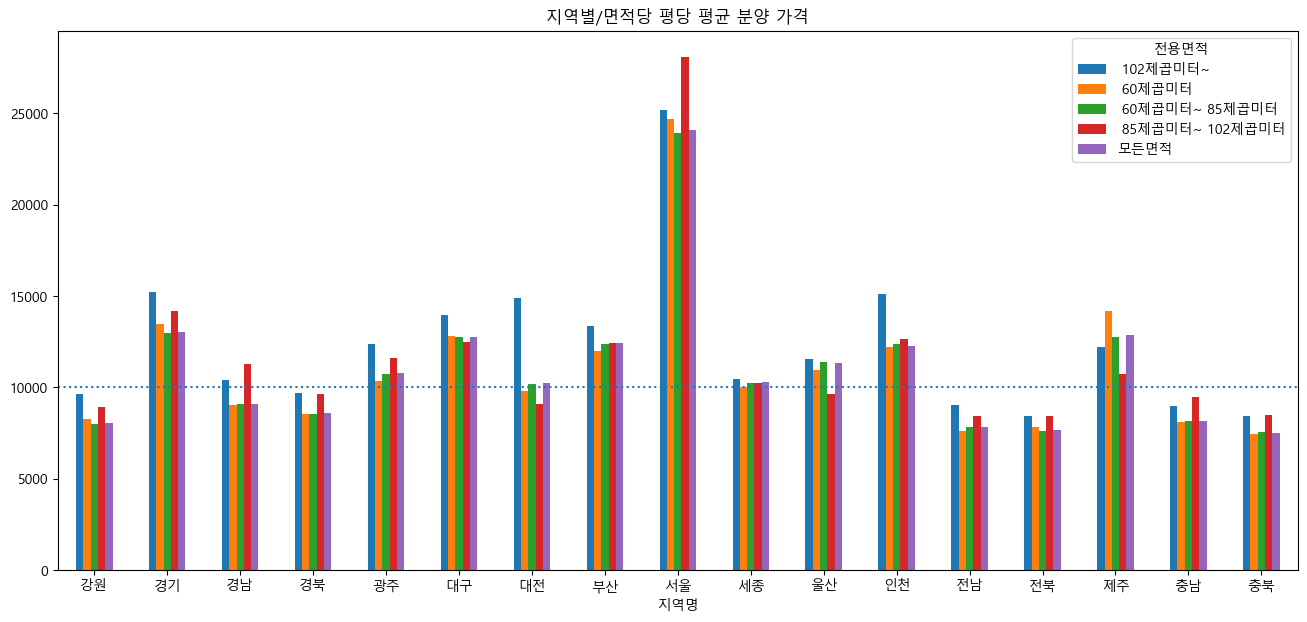

In [24]:
G1 = apt_last.groupby(['지역명','전용면적'])['평당분양가격'].mean().sort_values(ascending=True).unstack()
G1.plot.bar(rot=0, figsize=(16,7), title="지역별/면적당 평당 평균 분양 가격")
plt.axhline(10000, linestyle=":")

지역별 전용면적별 평당분양 가격

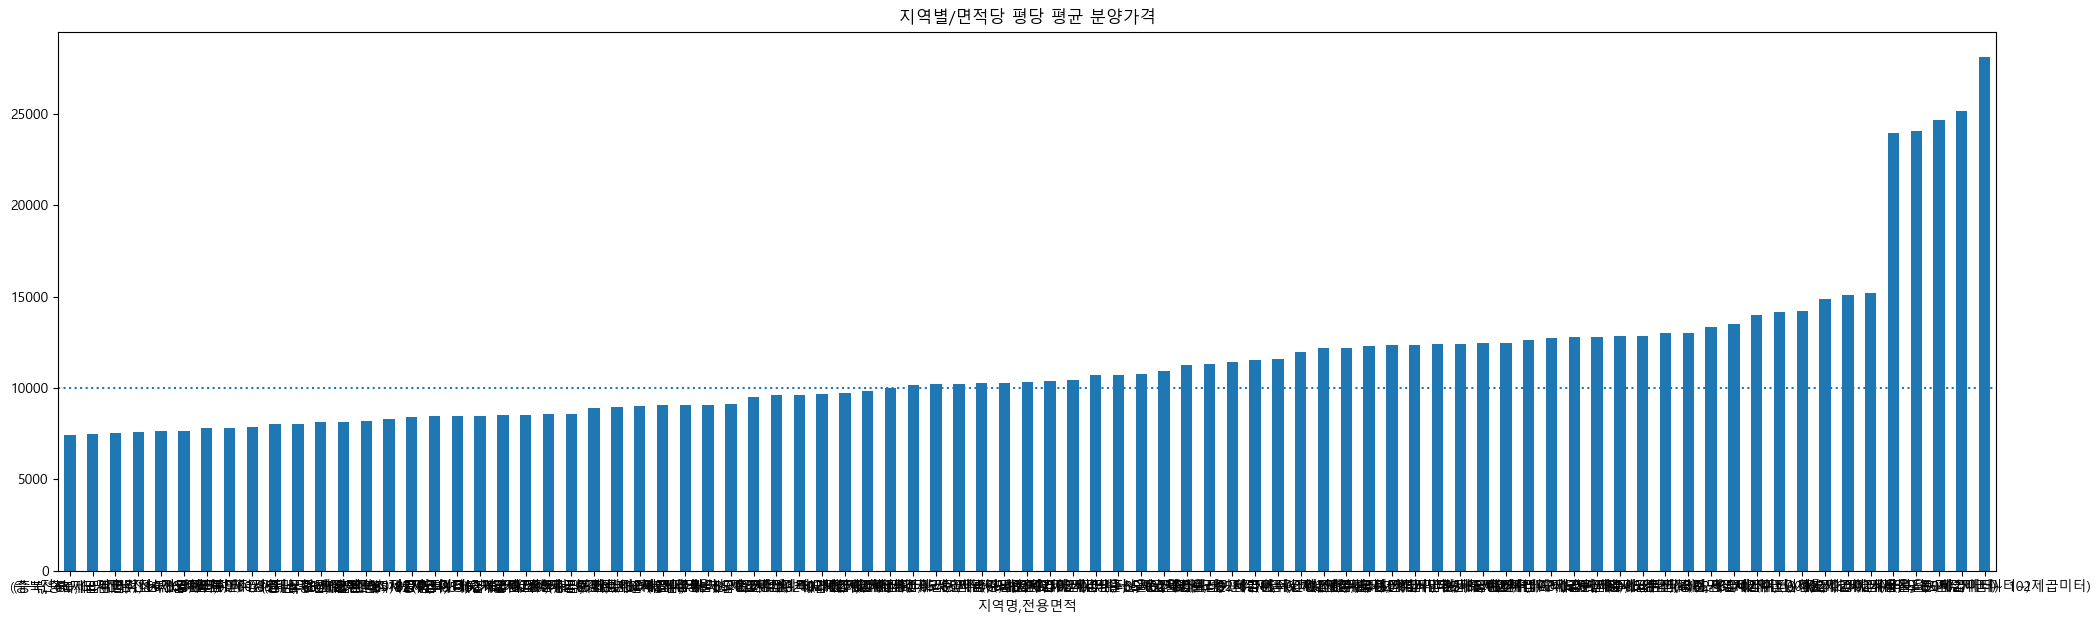

In [25]:
G1 = apt_last.groupby(['지역명','전용면적'])['평당분양가격'].mean().sort_values(ascending=True)
G1.plot.bar(rot=0, figsize=(25,7), title='지역별/면적당 평당 평균 분양가격')
plt.axhline(10000, linestyle=":")

연도별 지역별 평당 평균 분양가격

<Axes: xlabel='지역명'>

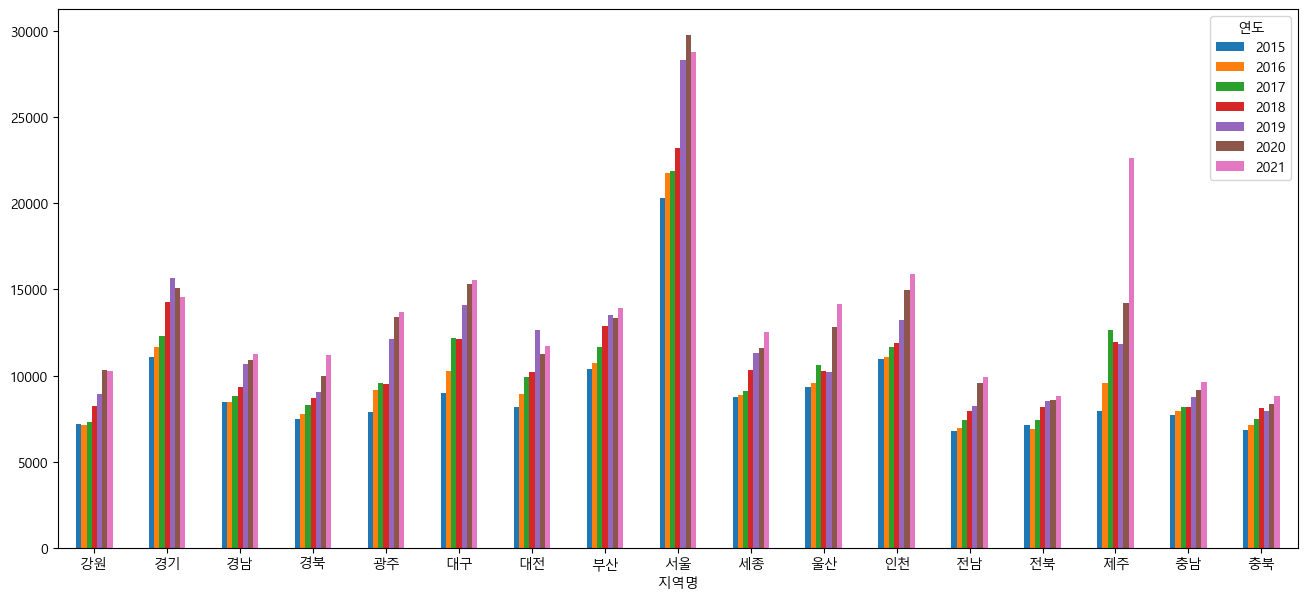

In [26]:
G1 = apt_last.groupby(['연도','지역명'])['평당분양가격'].mean().sort_values(ascending=True).unstack('연도')
G1.plot.bar(rot=0, figsize=(16,7))

array([<Axes: xlabel='지역명'>, <Axes: xlabel='지역명'>, <Axes: xlabel='지역명'>,
       <Axes: xlabel='지역명'>, <Axes: xlabel='지역명'>, <Axes: xlabel='지역명'>,
       <Axes: xlabel='지역명'>], dtype=object)

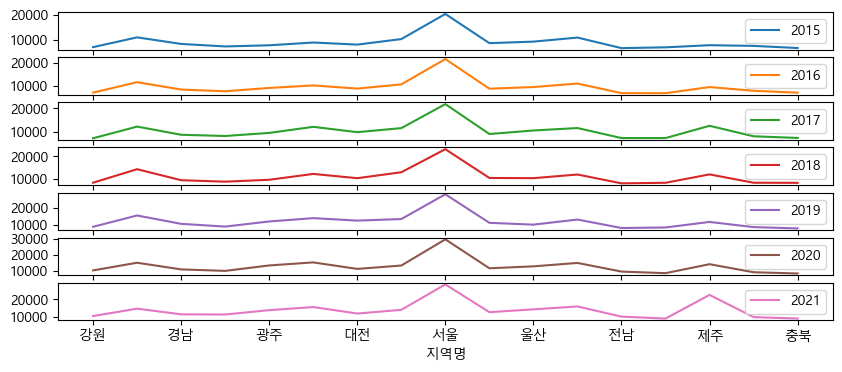

In [27]:
# 지역별 부분 그래프
G1.plot(subplots = True, figsize=(10,4))

# EDA 2 - Pivot Table로 데이터 집계

In [28]:
apt_last

,지역명,연도,월,분양가격(m2),평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,모든면적
1,서울,2015,10,5652.0,18651.6,60제곱미터
2,서울,2015,10,5882.0,19410.6,60제곱미터~ 85제곱미터
3,서울,2015,10,5721.0,18879.3,85제곱미터~ 102제곱미터
4,서울,2015,10,5879.0,19400.7,102제곱미터~
...,...,...,...,...,...,...
6285,제주,2021,11,NaN,NaN,모든면적
6286,제주,2021,11,NaN,NaN,60제곱미터
6287,제주,2021,11,NaN,NaN,60제곱미터~ 85제곱미터
6288,제주,2021,11,NaN,NaN,85제곱미터~ 102제곱미터


In [29]:
# group by 로 집계하던걸 pivot table로 집계
apt_last.pivot_table(index='지역명', values='평당분양가격')

,평당분양가격
지역명,
강원,8562.691837
경기,13775.231831
경남,9754.237283
경북,8946.151351
광주,11052.022222
대구,12969.009538
대전,10516.325000
부산,12510.950704
서울,25185.422380


전용면적당 평당 분양가격 평균

In [30]:
apt_last.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
 102제곱미터~           12228.519907
 60제곱미터             11011.521770
 60제곱미터~ 85제곱미터     10969.213877
 85제곱미터~ 102제곱미터    11884.432017
모든면적                10990.281795
Name: 평당분양가격, dtype: float64

위의 결과를 피봇으로 

In [31]:
apt_last.pivot_table(index='전용면적',values='평당분양가격')

,평당분양가격
전용면적,
102제곱미터~,12228.519907
60제곱미터,11011.521770
60제곱미터~ 85제곱미터,10969.213877
85제곱미터~ 102제곱미터,11884.432017
모든면적,10990.281795


피봇 사용 지역명, 전용 면적을 기준으로 평당 분양가격

In [32]:
apt_last.pivot_table(index = '전용면적', columns = '지역명', values='평당분양가격').astype(int)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102제곱미터~,9641,15200,10376,9695,12347,13977,14875,13340,25179,10460,11522,15112,9054,8422,12200,8960,8454
60제곱미터,8273,13480,9006,8515,10319,12818,9819,11966,24676,10016,10919,12210,7633,7851,14199,8108,7419
60제곱미터~ 85제곱미터,8011,12993,9062,8549,10706,12770,10162,12386,23926,10230,11401,12355,7830,7602,12734,8167,7547
85제곱미터~ 102제곱미터,8903,14170,11265,9611,11586,12452,9077,12422,28091,10252,9621,12641,8441,8436,10709,9483,8509
모든면적,8041,13031,9100,8568,10786,12761,10214,12439,24053,10274,11322,12274,7825,7634,12845,8145,7497


피봇 사용 연도, 지역명을 평당 분양 가격 평균

In [33]:
apt_last.pivot_table(index='연도', columns='지역명', values='평당분양가격').astype(int)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188,11060,8459,7464,7916,9018,8190,10377,20315,8765,9367,10976,6798,7110,7951,7689,6828
2016,7162,11684,8496,7753,9190,10282,8910,10743,21753,8857,9582,11099,6936,6906,9567,7958,7133
2017,7318,12296,8806,8288,9599,12191,9912,11637,21864,9132,10630,11672,7413,7406,12628,8157,7462
2018,8219,14258,9327,8680,9526,12139,10234,12889,23202,10340,10241,11881,7929,8174,11935,8201,8149
2019,8934,15665,10697,9050,12111,14081,12619,13537,28286,11299,10216,13249,8219,8532,11828,8748,7970
2020,10302,15106,10919,9997,13406,15314,11238,13353,29781,11628,12837,14982,9562,8559,14192,9139,8358
2021,10285,14590,11270,11172,13714,15525,11740,13900,28748,12541,14179,15887,9930,8801,22619,9645,8805


# EDA 3 - Seaborn 시각화

In [34]:
import seaborn as sns

In [35]:
sns.set_style('darkgrid', rc={"font.family" : "Malgun Gothic"})

Bar Plot 으로 지역별 평당 분양 가격 그리기

<Axes: xlabel='지역명', ylabel='평당분양가격'>

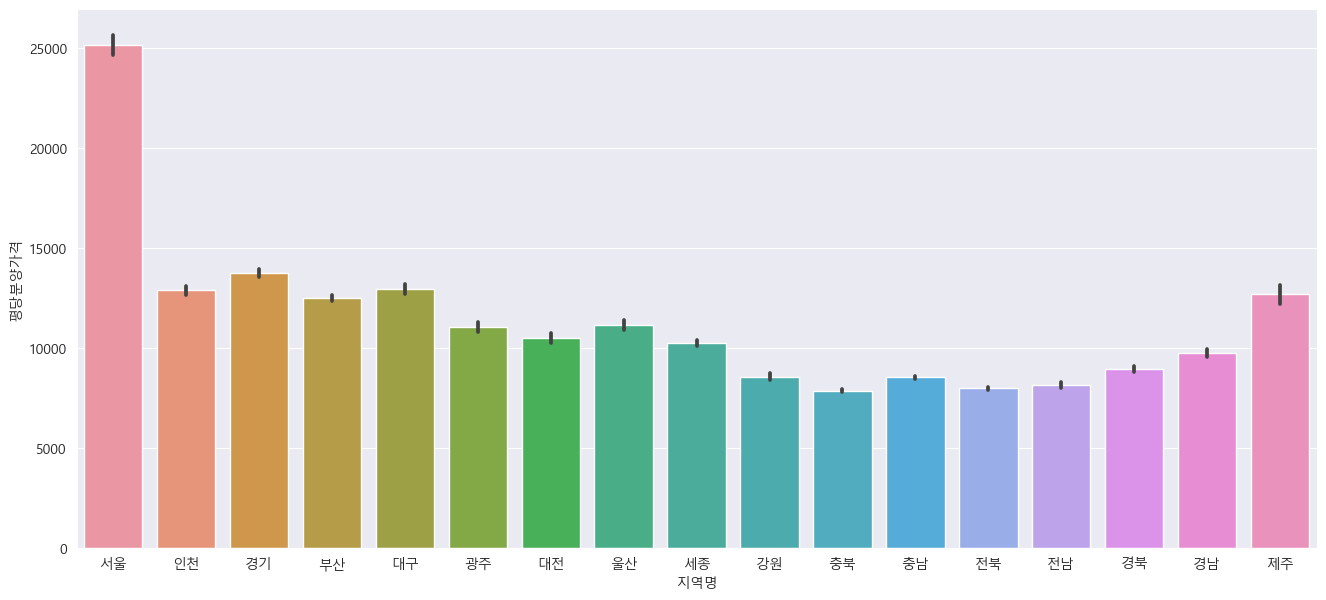

In [36]:
plt.figure(figsize=(16,7))
sns.barplot(data=apt_last, x='지역명', y='평당분양가격')

Bar plot으로 연도별 평당 분양 가격 그리기

<Axes: xlabel='연도', ylabel='평당분양가격'>

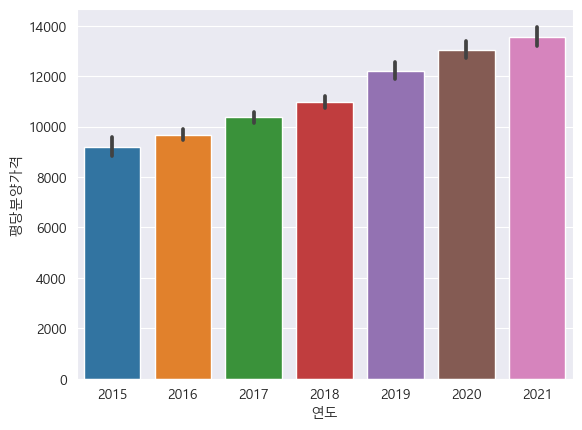

In [37]:
sns.barplot(data=apt_last, x='연도', y='평당분양가격')

부분별로 나눠 그래프 그리기

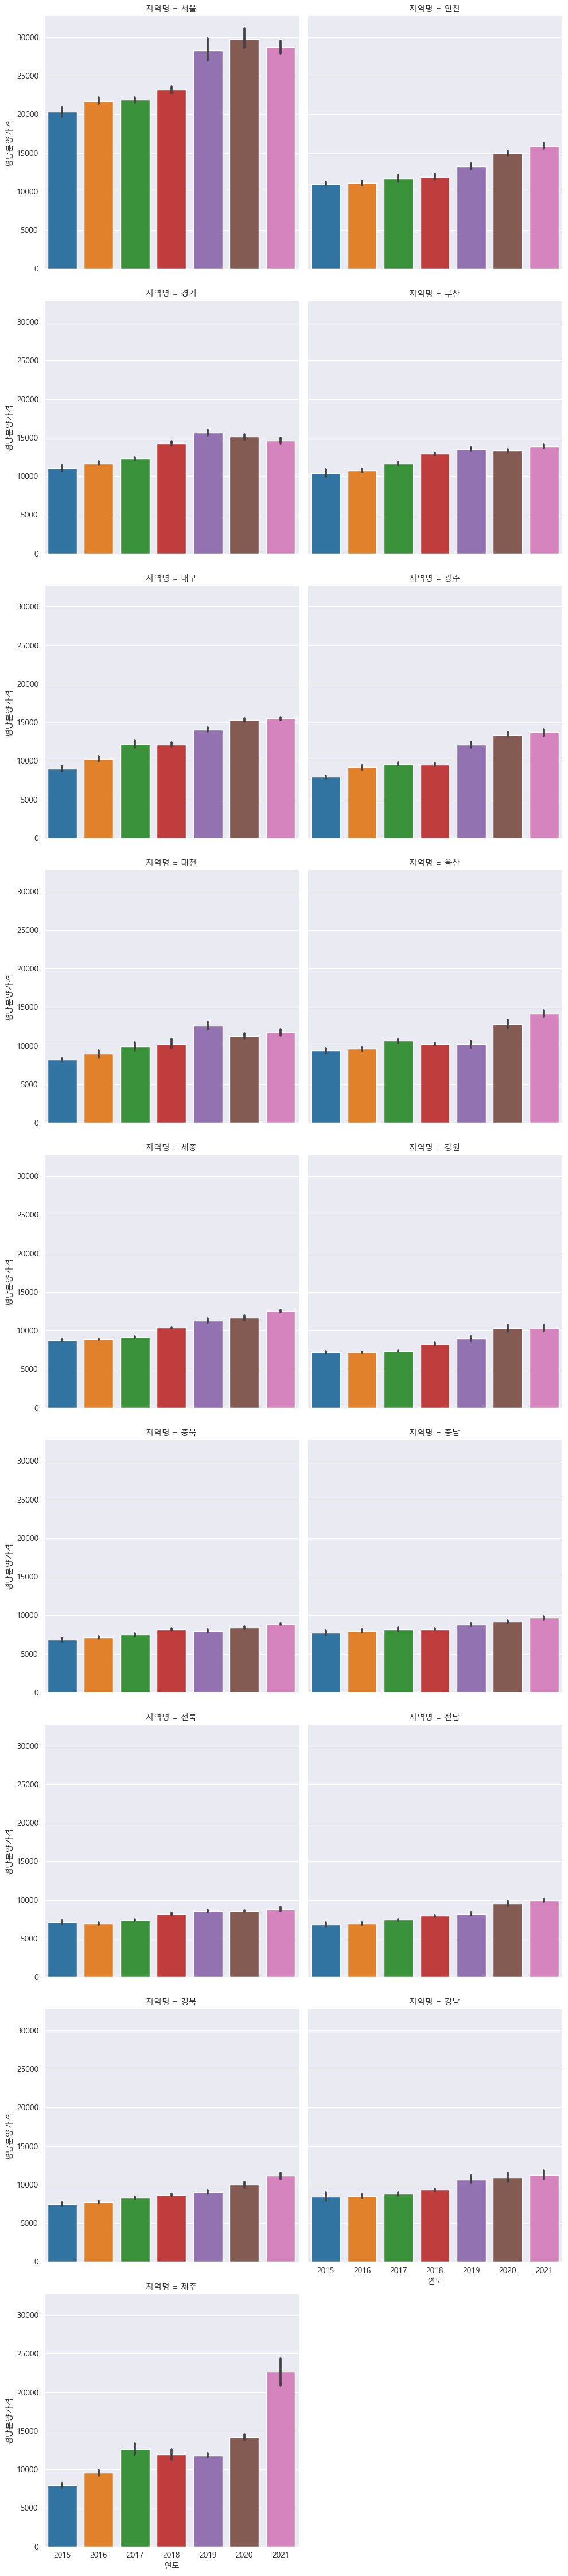

In [38]:
sns.catplot(data=apt_last, x='연도', y='평당분양가격', kind='bar', col='지역명',col_wrap=2)

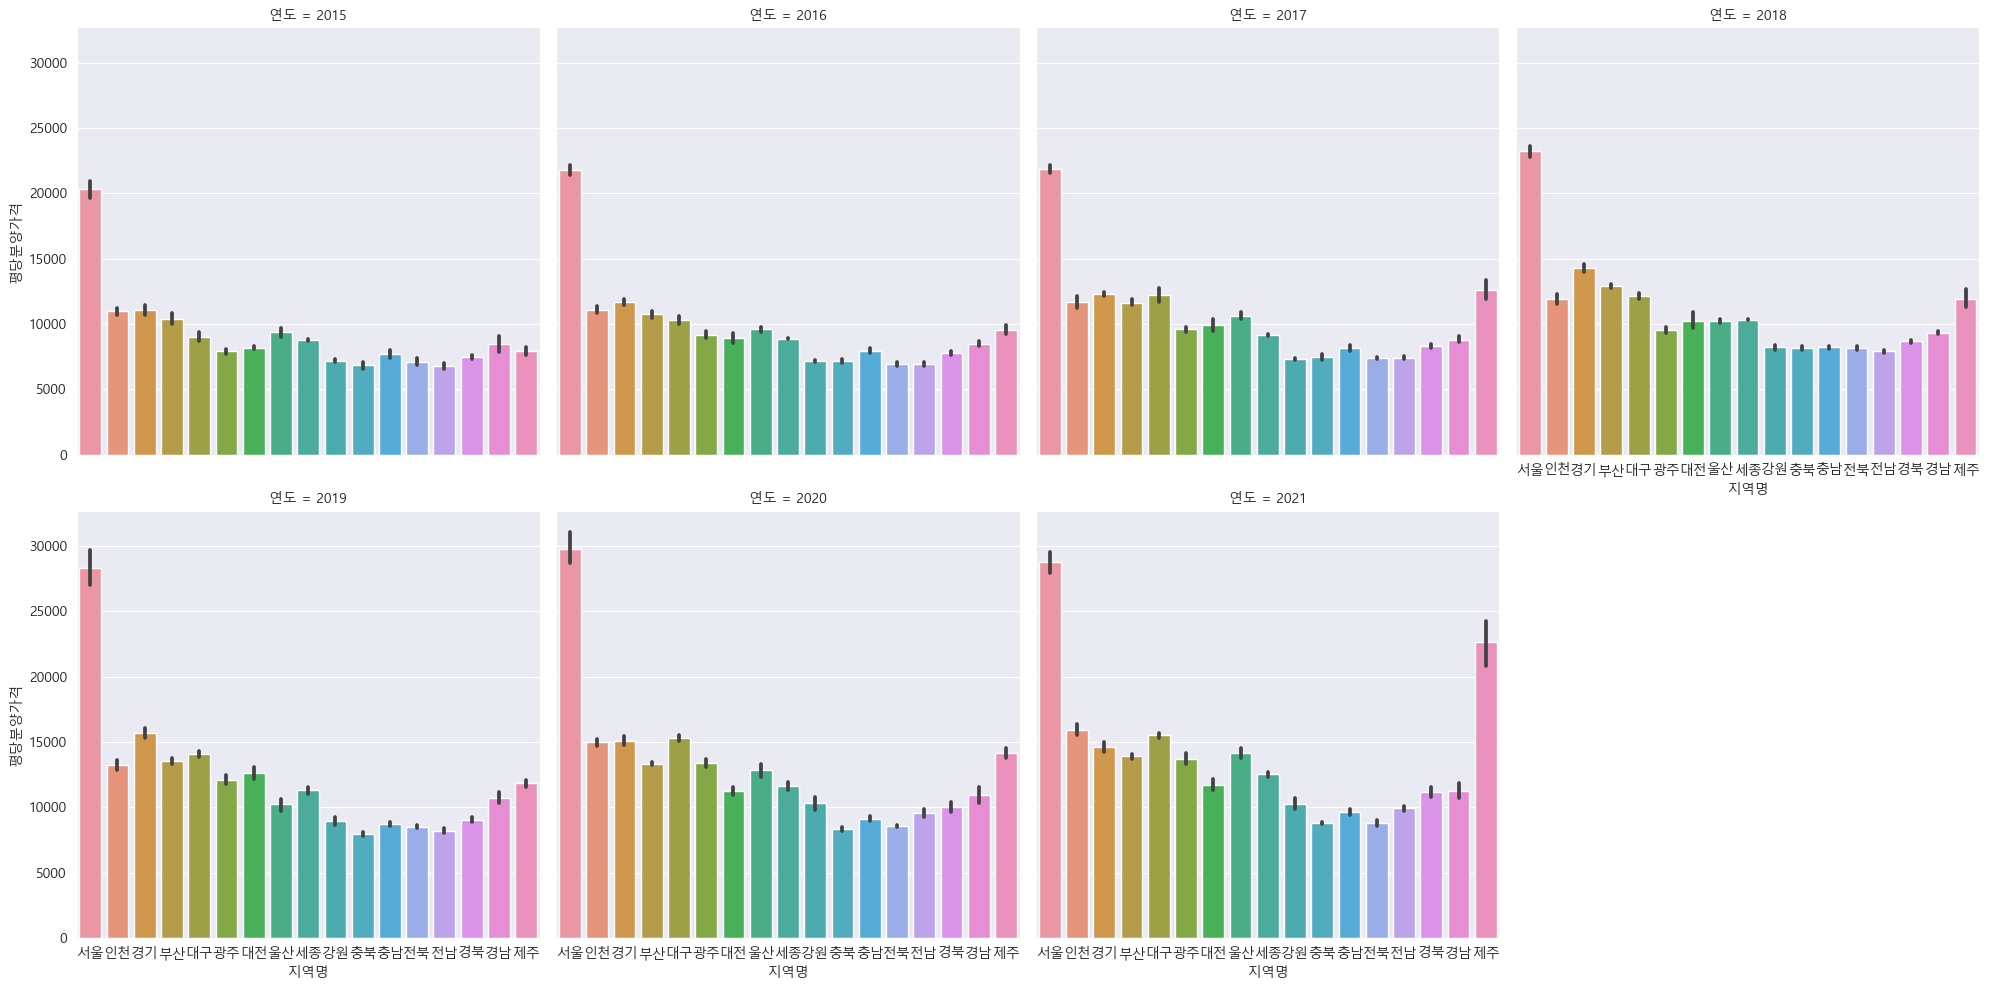

In [39]:
sns.catplot(data=apt_last, x='지역명', y='평당분양가격',kind='bar',col='연도',col_wrap=4)

라인 플롯으로 연도별 평당 분양 가격 그리기<br>
hue 옵션으로 지역별 다르게 표시

<Axes: xlabel='연도', ylabel='평당분양가격'>

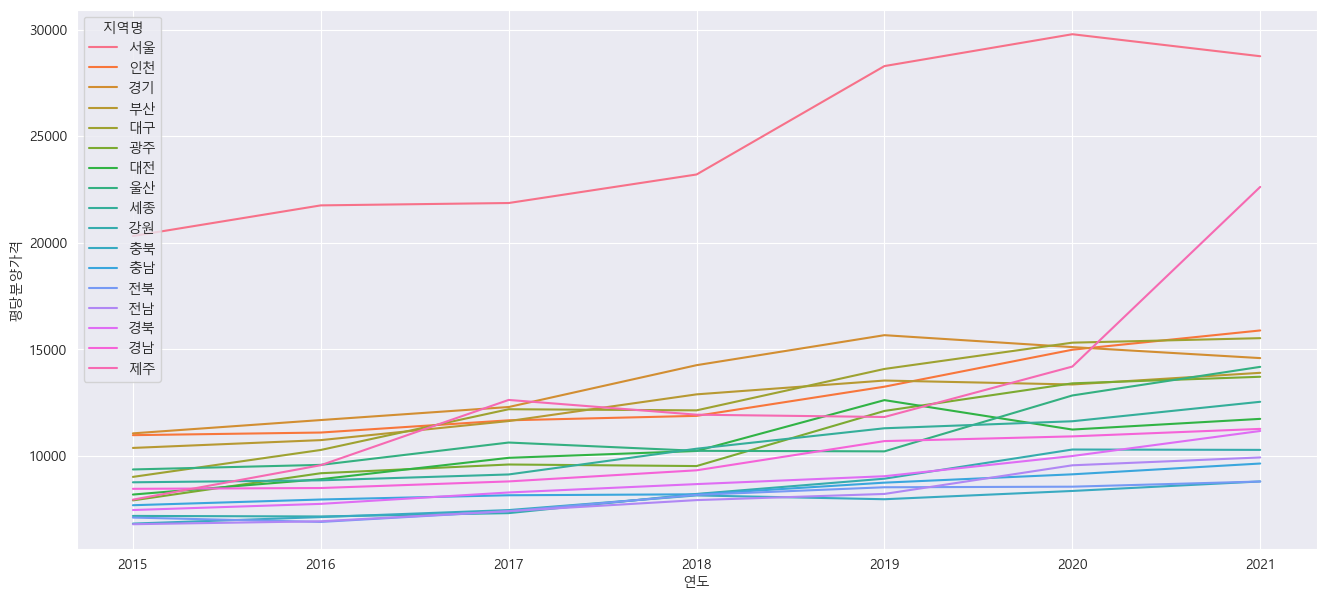

In [40]:
plt.figure(figsize=(16,7))
sns.lineplot(data=apt_last, x='연도', y='평당분양가격',hue='지역명', ci=None)

relplot으로 각 서브 플롯 그리기

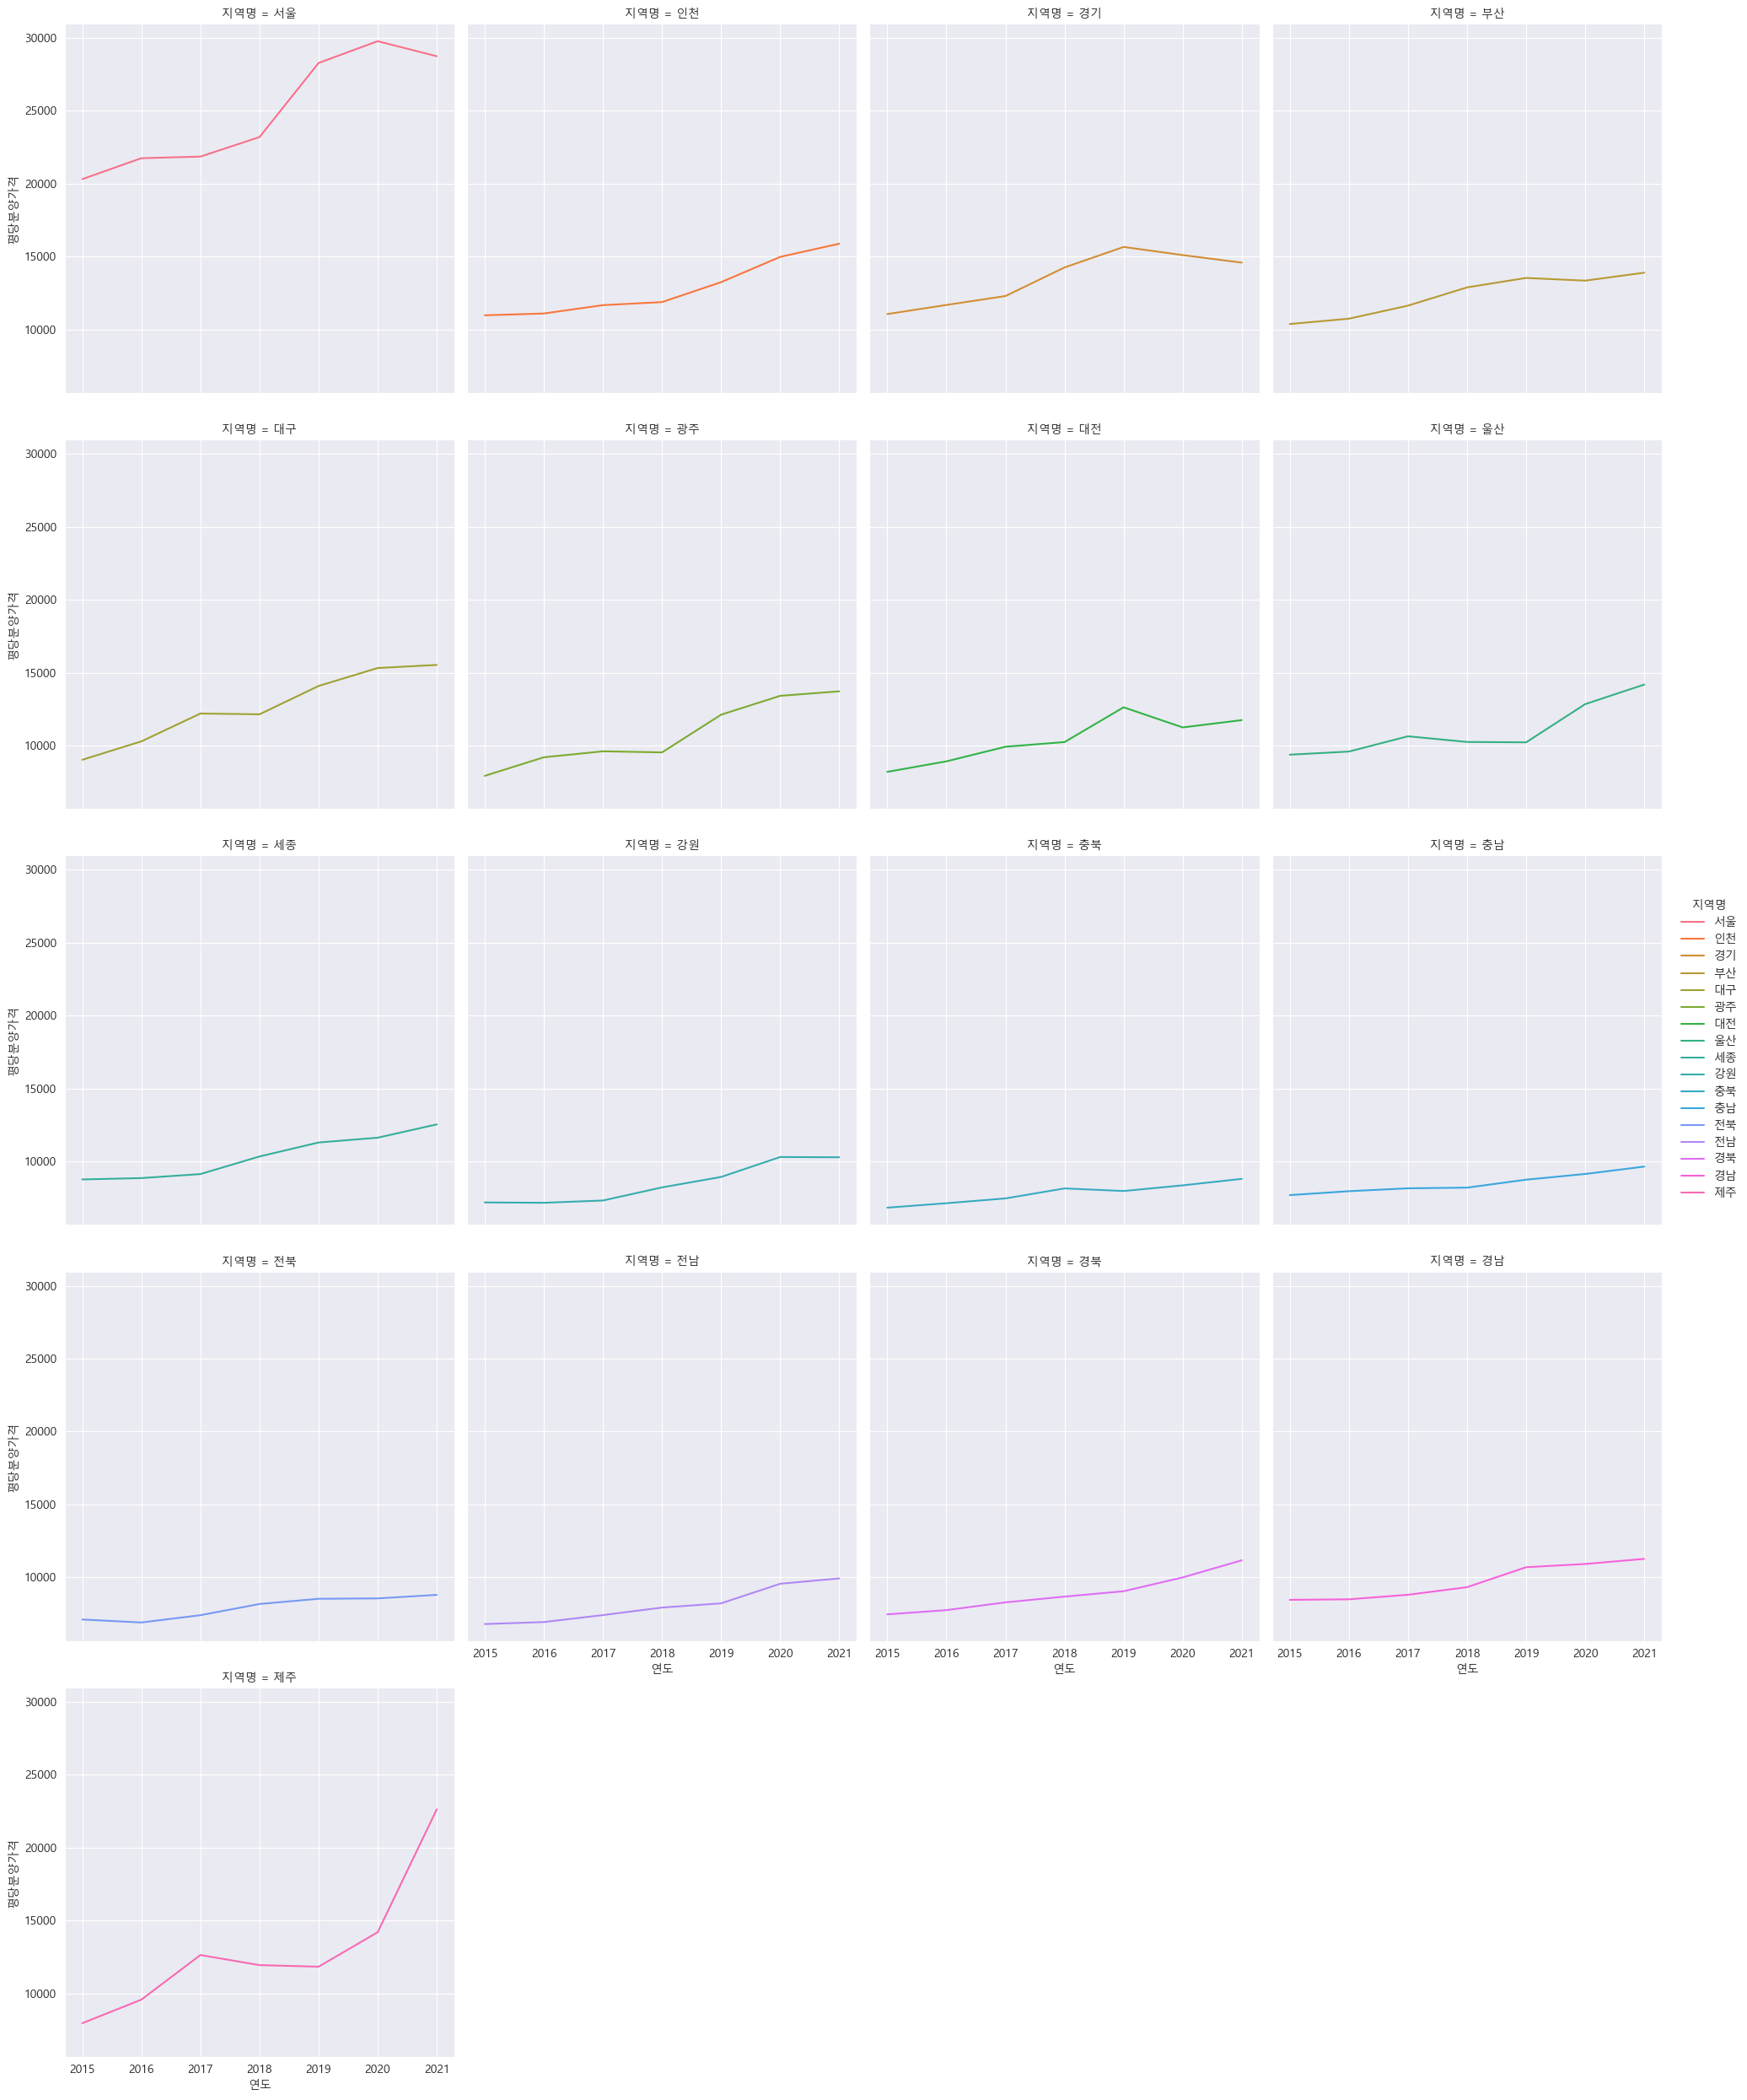

In [41]:
sns.relplot(data=apt_last, x='연도', y='평당분양가격', hue='지역명', kind='line', col='지역명', col_wrap = 4, ci=None)

연도별 평당 분양 가격을 boxplot으로 그리기

<Axes: xlabel='연도', ylabel='평당분양가격'>

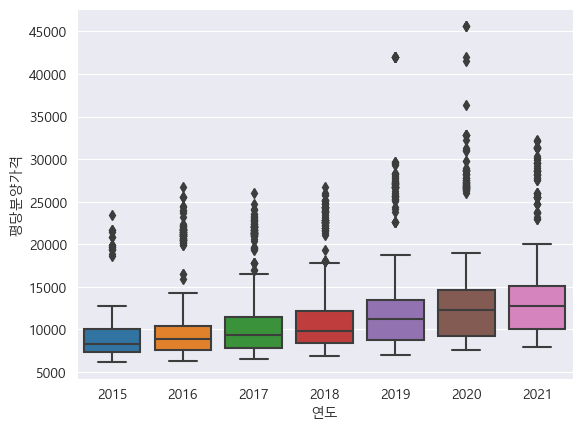

In [42]:
sns.boxplot(data=apt_last, x='연도', y='평당분양가격')

hue 옵션으로 전용 면적별로 다르게 표시

<Axes: xlabel='연도', ylabel='평당분양가격'>

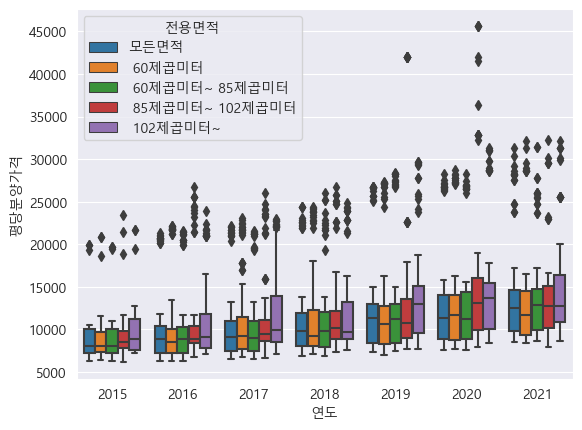

In [43]:
sns.boxplot(data=apt_last, x='연도', y='평당분양가격', hue='전용면적')

연도별 평당 분양 가격을 violinplot으로 그리기

<Axes: xlabel='연도', ylabel='평당분양가격'>

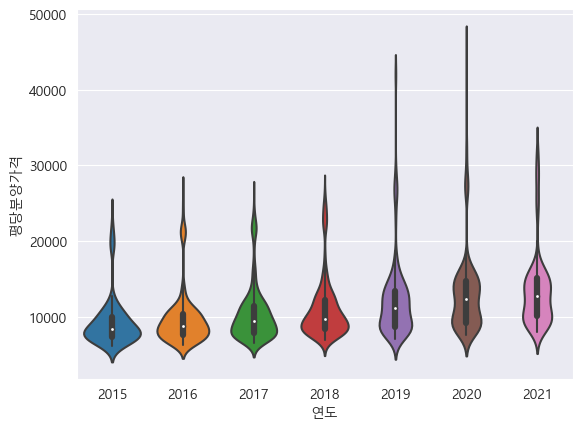

In [44]:
sns.violinplot(data=apt_last, x='연도', y='평당분양가격')

연도별 평당 분양 가격 을 swarmplot으로 그리기<br>
swarmplot은 범주형 데이터의 산점도를 표현할 때 사용

<Axes: xlabel='연도', ylabel='평당분양가격'>

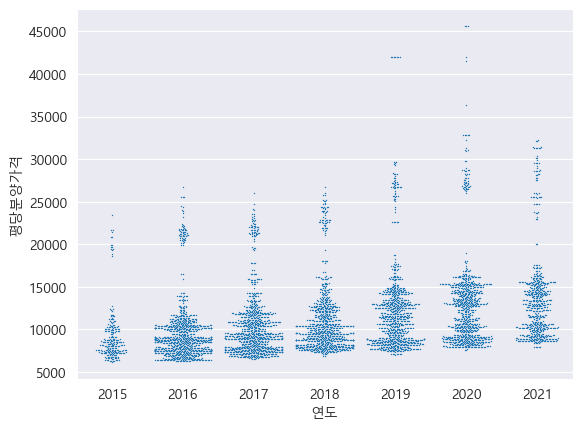

In [45]:
sns.swarmplot(data=apt_last, x='연도',y='평당분양가격',size =1)

# 이상치 확인

서울의 평당 분양 가격이 특히 높은 데이터가 존재함, 해당 데이터를 가져옴

In [46]:
apt_last[apt_last['평당분양가격']>40000]

,지역명,연도,월,분양가격(m2),평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85제곱미터~ 102제곱미터
3828,서울,2019,7,12728.0,42002.4,85제곱미터~ 102제곱미터
3913,서울,2019,8,12728.0,42002.4,85제곱미터~ 102제곱미터
3998,서울,2019,9,12728.0,42002.4,85제곱미터~ 102제곱미터
4083,서울,2019,10,12728.0,42002.4,85제곱미터~ 102제곱미터
4168,서울,2019,11,12728.0,42002.4,85제곱미터~ 102제곱미터
4253,서울,2019,12,12728.0,42002.4,85제곱미터~ 102제곱미터
4338,서울,2020,1,12728.0,42002.4,85제곱미터~ 102제곱미터
4423,서울,2020,2,13835.0,45655.5,85제곱미터~ 102제곱미터
4508,서울,2020,3,13835.0,45655.5,85제곱미터~ 102제곱미터


수치 데이터 히스토그램 그리기

array([[<Axes: title={'center': '연도'}>, <Axes: title={'center': '월'}>],
       [<Axes: title={'center': '분양가격(m2)'}>,
        <Axes: title={'center': '평당분양가격'}>]], dtype=object)

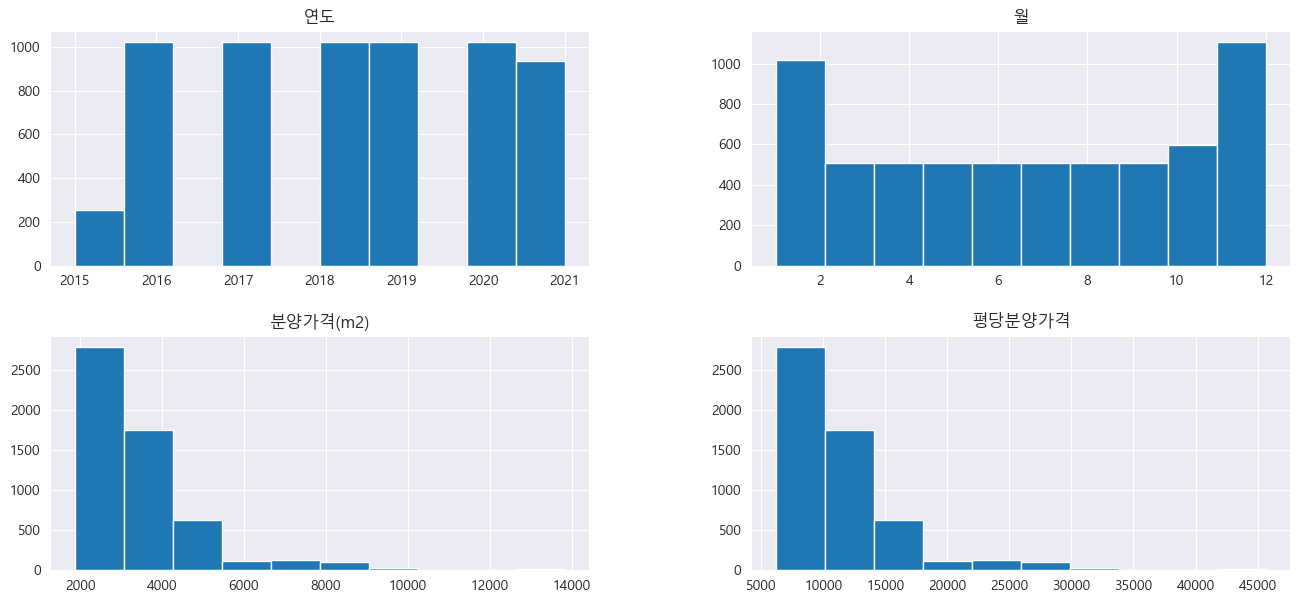

In [47]:
apt_last.hist(figsize=(16,7))

Pairplot으로 데이터 표현

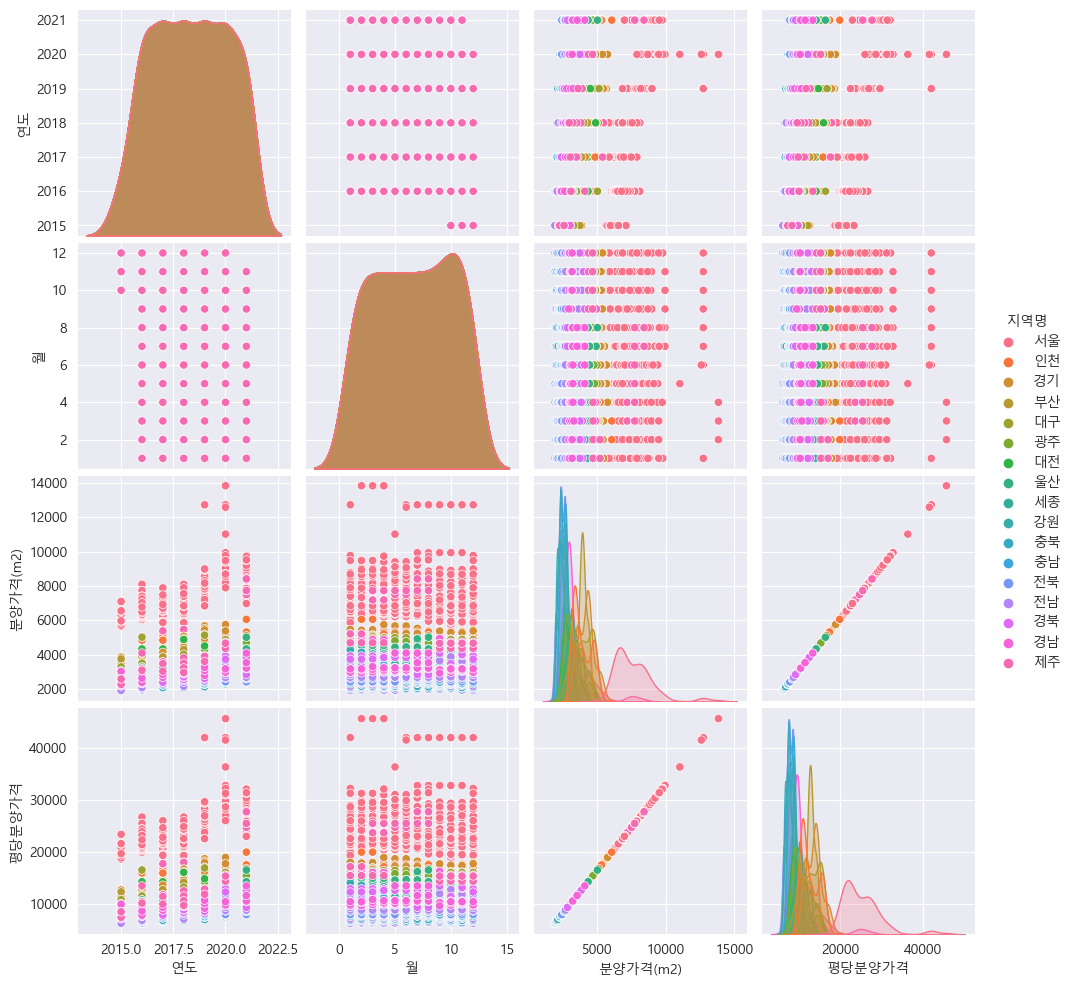

In [48]:
sns.pairplot(data=apt_last, hue='지역명')

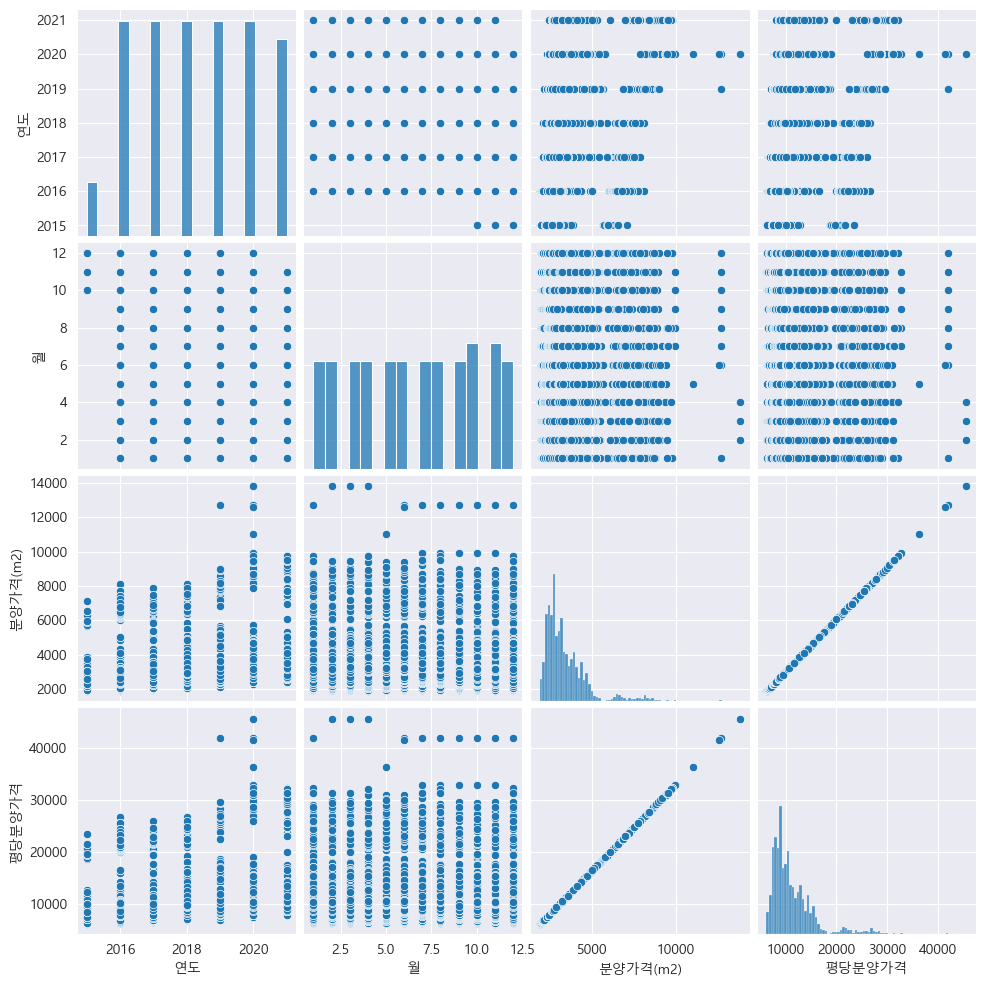

In [49]:
sns.pairplot(data=apt_last)

연도를 인덱스로하고 지역명을 컬럼으로 평당 분양 가격을 피봇 테이블로 그리기

In [50]:
G2 = pd.pivot_table(data=apt_last, index = '연도', columns ='지역명', values = '평당분양가격' )

In [51]:
G2

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.9400,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.4000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.9700,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.5350,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.1850,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.6150,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.4200,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.9650,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.5400,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.8650,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.0800,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.0100,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10285.522500,14590.5375,11270.325000,11172.232500,13714.708333,15525.427500,11740.300000,13900.1775,28748.992105,12541.320000,14179.600000,15887.025000,9930.800000,8801.861538,22619.469231,9645.639474,8805.142500


In [52]:
G2.astype(int).style.background_gradient()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188,11060,8459,7464,7916,9018,8190,10377,20315,8765,9367,10976,6798,7110,7951,7689,6828
2016,7162,11684,8496,7753,9190,10282,8910,10743,21753,8857,9582,11099,6936,6906,9567,7958,7133
2017,7318,12296,8806,8288,9599,12191,9912,11637,21864,9132,10630,11672,7413,7406,12628,8157,7462
2018,8219,14258,9327,8680,9526,12139,10234,12889,23202,10340,10241,11881,7929,8174,11935,8201,8149
2019,8934,15665,10697,9050,12111,14081,12619,13537,28286,11299,10216,13249,8219,8532,11828,8748,7970
2020,10302,15106,10919,9997,13406,15314,11238,13353,29781,11628,12837,14982,9562,8559,14192,9139,8358
2021,10285,14590,11270,11172,13714,15525,11740,13900,28748,12541,14179,15887,9930,8801,22619,9645,8805


상위 피봇테이블을 히트맵으로 표현

<Axes: xlabel='지역명', ylabel='연도'>

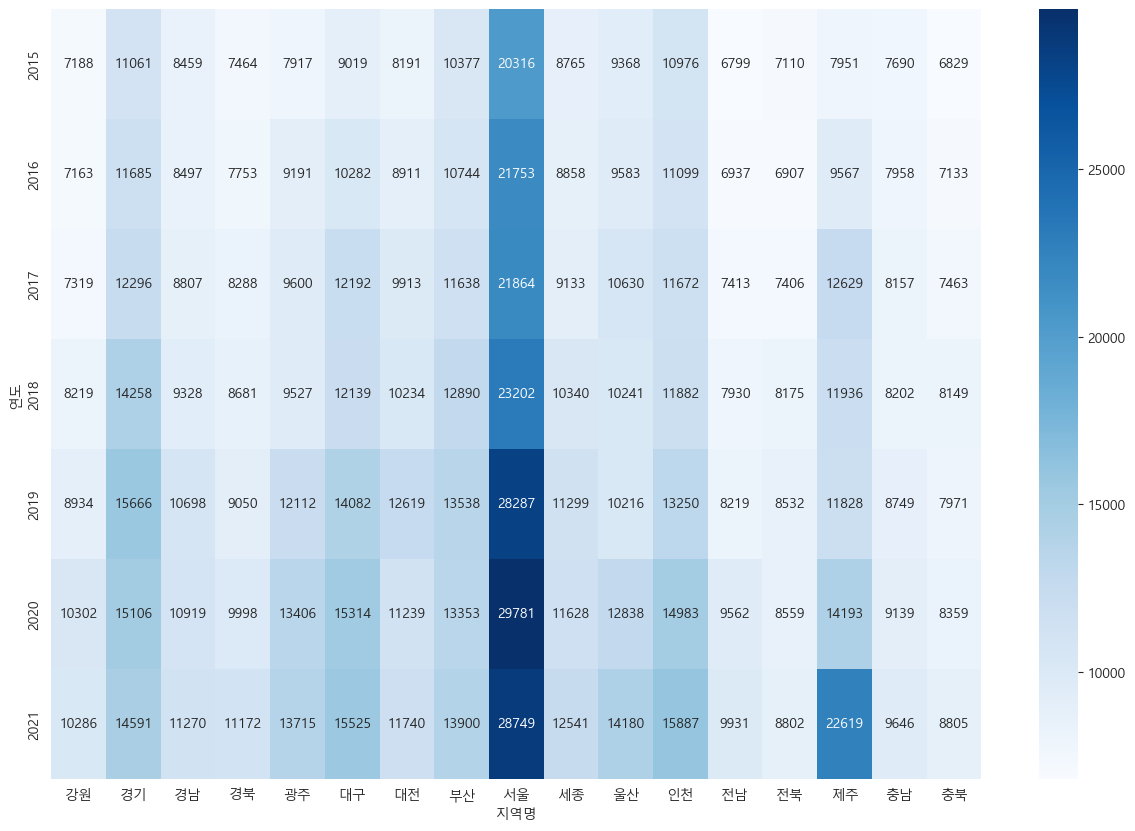

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(data=G2, annot=True, cmap="Blues", fmt=".0f")

transpose를 사용하면 행과 열이 바뀜. 바뀐 행과 열을 히트맵으로 표현

<Axes: xlabel='연도', ylabel='지역명'>

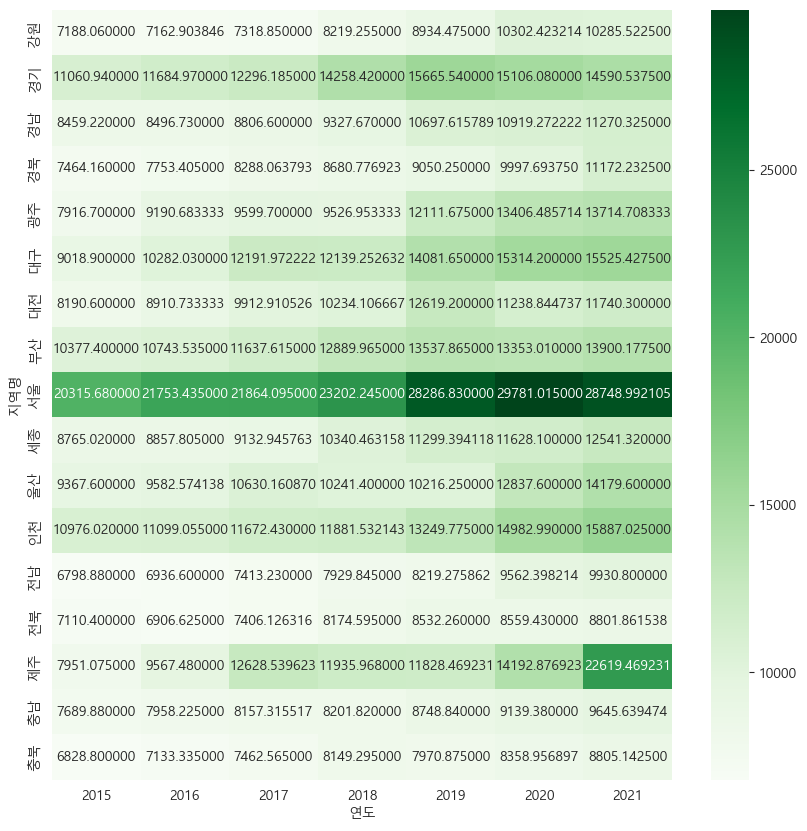

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(data=G2.T, annot=True, cmap="Greens", fmt="0f")

# EDA - 4 연도별 평당분양 가격보기

Barplot으로 연도별 평당 분양 가격 그리기

<Axes: xlabel='연도', ylabel='평당분양가격'>

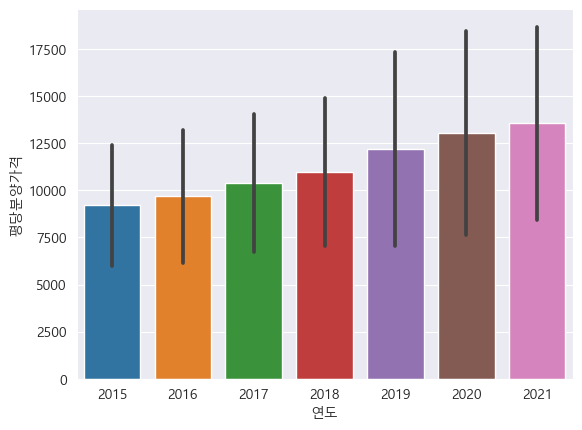

In [55]:
sns.barplot(data=apt_last, x='연도',y='평당분양가격',ci='sd')

pointplot으로 연도별 평당분양가격 그리기

<Axes: xlabel='연도', ylabel='평당분양가격'>

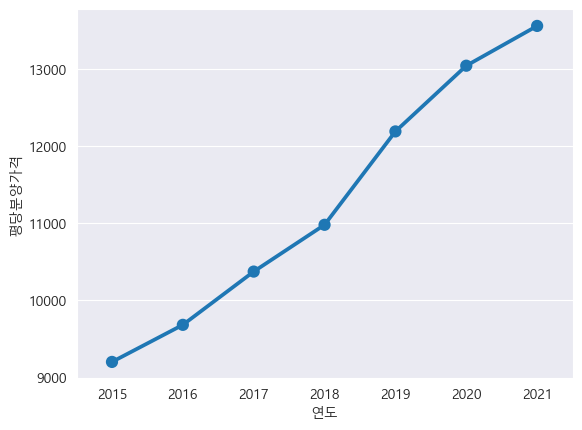

In [56]:
sns.pointplot(data=apt_last, x='연도', y='평당분양가격', ci=None)

서울만 barplot으로 그리기

<Axes: xlabel='연도', ylabel='평당분양가격'>

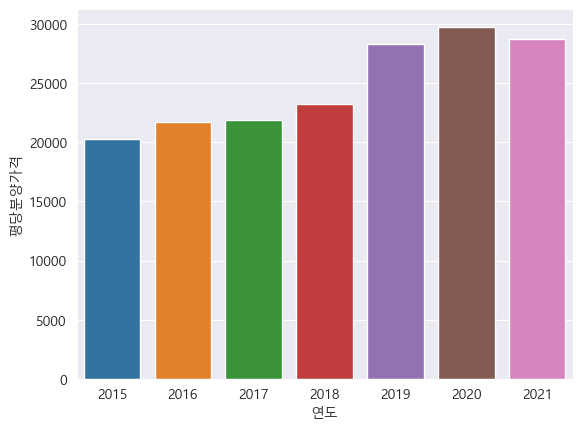

In [57]:
sns.barplot(data=apt_last[apt_last['지역명']=='서울'], x='연도', y='평당분양가격', ci=None)

연도별 평당분양가격 boxplot으로 그리기

<Axes: xlabel='연도', ylabel='평당분양가격'>

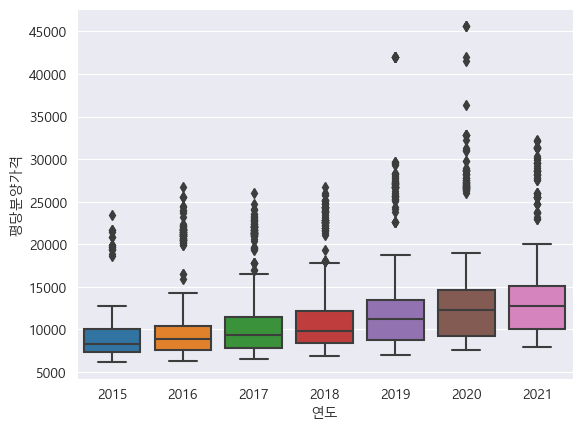

In [58]:
sns.boxplot(data=apt_last, x='연도', y='평당분양가격')

연도별 평당 분양 가격 violinplot으로 그리기

<Axes: xlabel='연도', ylabel='평당분양가격'>

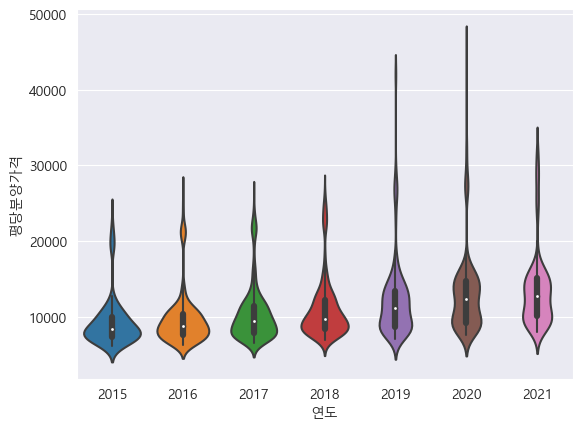

In [59]:
sns.violinplot(data=apt_last, x='연도', y='평당분양가격')

연도별 평당 분양 가격 swarmplot 그리기

<Axes: xlabel='연도', ylabel='평당분양가격'>

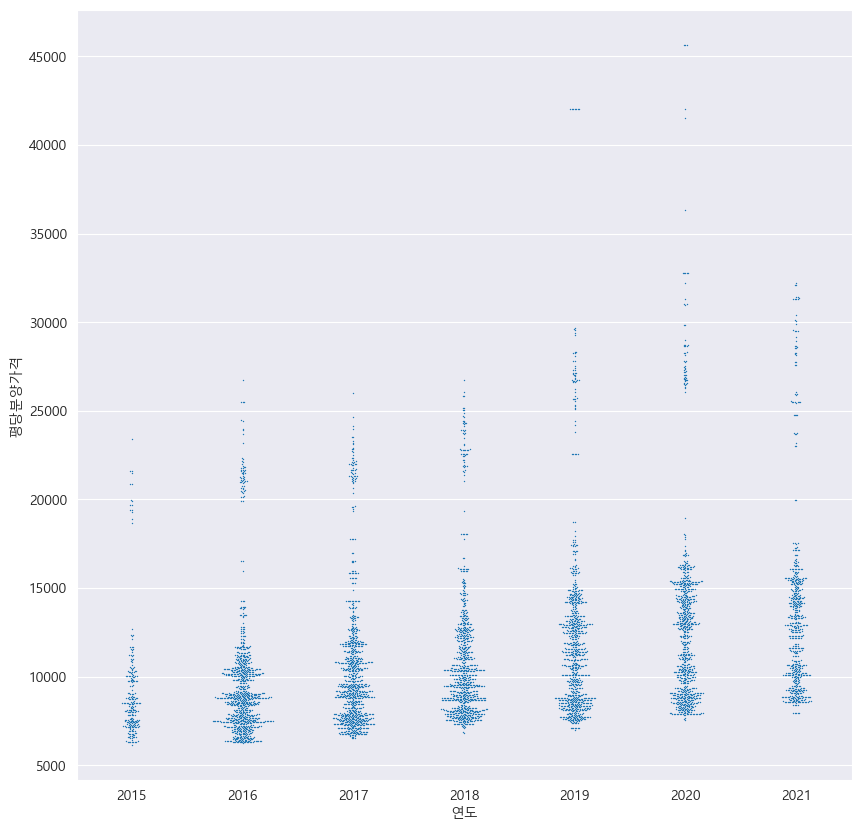

In [60]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=apt_last, x='연도', y='평당분양가격', size=1)

# EDA - 5 지역별 평당 분양 가격 보기

barplot으로 지역별 평당분양 가격 그리기

<Axes: xlabel='지역명', ylabel='평당분양가격'>

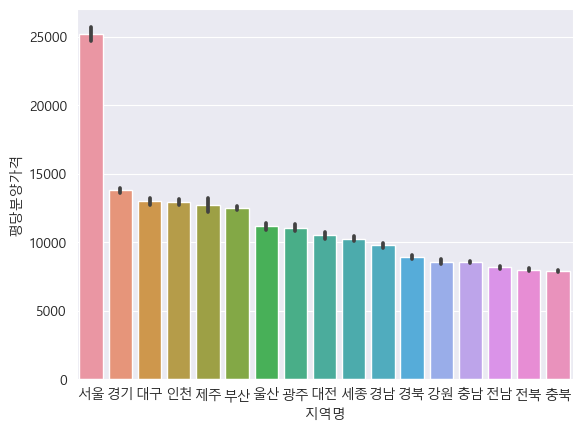

In [61]:
G3 = apt_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False)
sns.barplot(data=apt_last.sort_values('지역명'), x='지역명', y='평당분양가격', order = G3.index)

boxplot으로  지역별 평당분양 가격 그리기

<Axes: xlabel='지역명', ylabel='평당분양가격'>

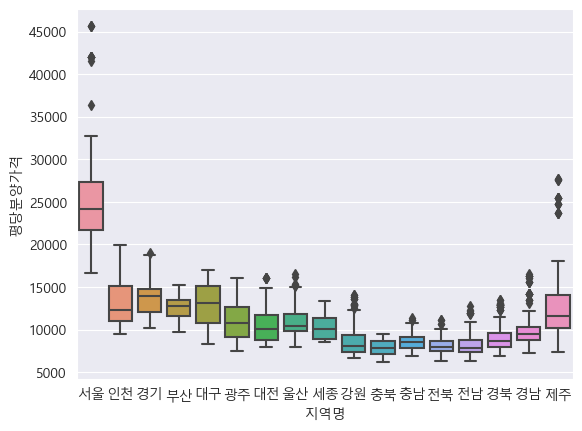

In [62]:
sns.boxplot(data=apt_last, x='지역명', y='평당분양가격')

지역별 평당 분양 가격 violinplot으로 그리기

<Axes: xlabel='지역명', ylabel='평당분양가격'>

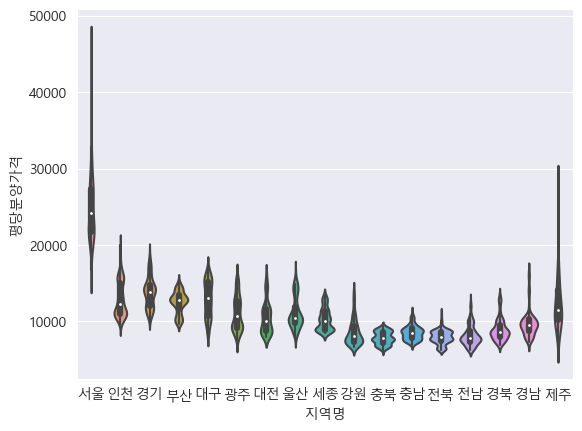

In [63]:
sns.violinplot(data=apt_last, x='지역명', y='평당분양가격')

지역별 평당 분양가격 swarmplot으로 그리기

<Axes: xlabel='지역명', ylabel='평당분양가격'>

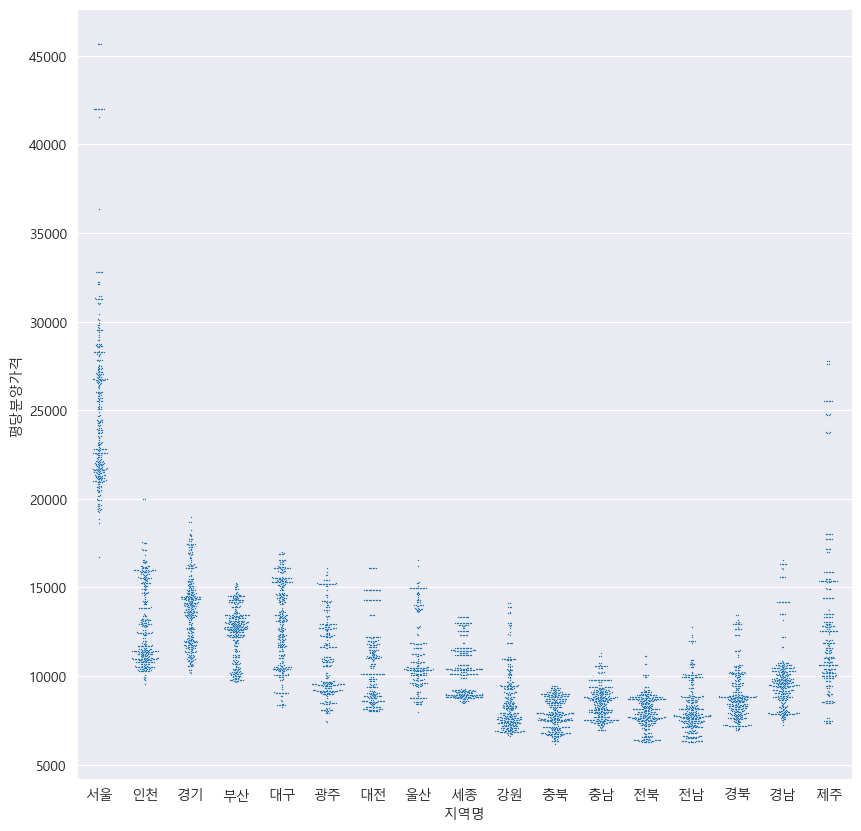

In [64]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=apt_last, x='지역명', y='평당분양가격', size=1)

연도별 평당분양가격 swarmplot으로 그리기

<Axes: xlabel='연도', ylabel='평당분양가격'>

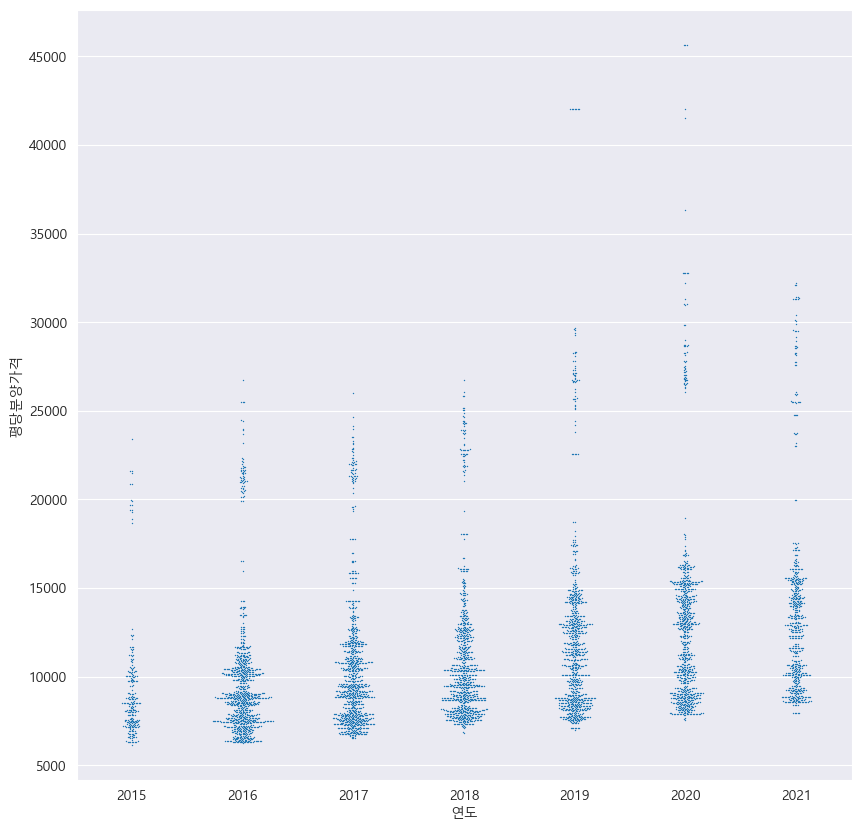

In [65]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=apt_last, x='연도', y='평당분양가격', size=1 )